In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('iris.csv')
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
data.drop('Id',inplace=True,axis=1)
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


## Visualization

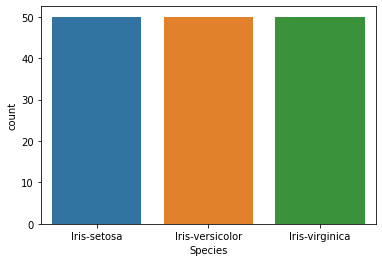

In [6]:
species = sns.countplot(data=data,x='Species')

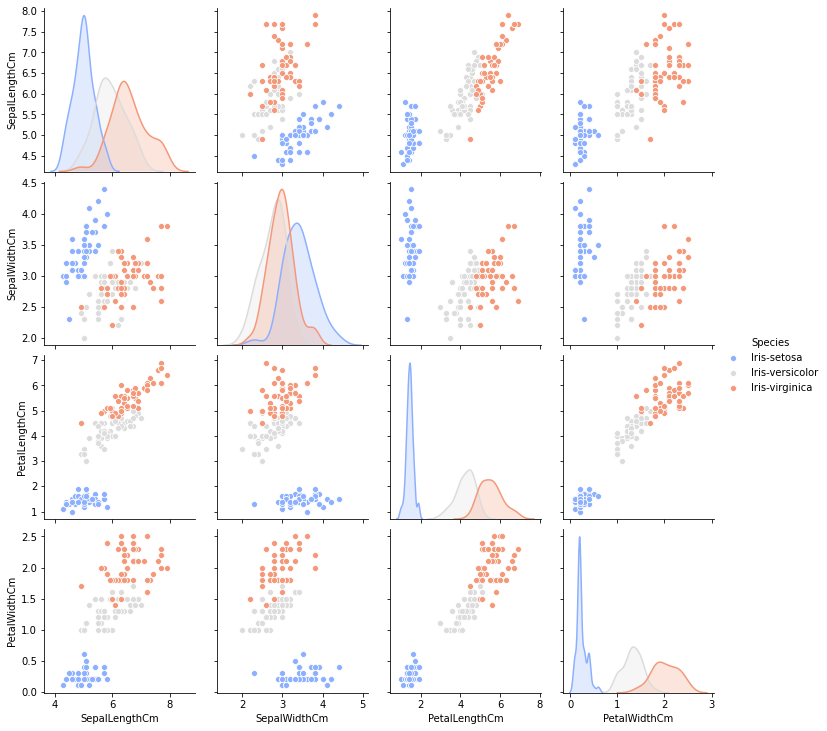

In [7]:
fig =sns.pairplot(data,palette='coolwarm',hue='Species')
fig.savefig('pairplot.png')

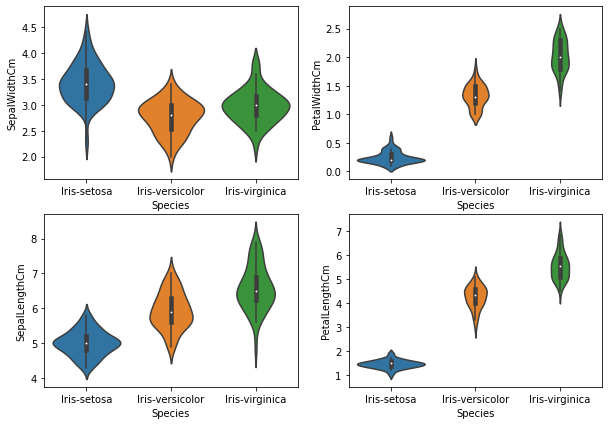

In [8]:
fig,axes = plt.subplots(2,2,figsize=(10,7))
sns.violinplot(data=data,y='SepalWidthCm',ax=axes[0, 0],x='Species')
sns.violinplot(data=data,y='SepalLengthCm', ax=axes[1, 0],x='Species')
sns.violinplot(data=data,y='PetalWidthCm', ax=axes[0, 1],x='Species')
sns.violinplot(data=data,y='PetalLengthCm', ax=axes[1,1],x='Species')
fig.savefig('violinplot.png')

## Checking Outliers

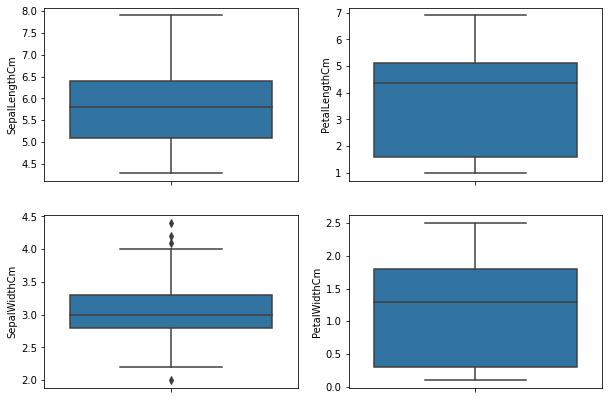

In [9]:
fig,axes = plt.subplots(2,2,figsize=(10,7))
sns.boxplot(data=data,y='SepalLengthCm',ax=axes[0,0])
sns.boxplot(data=data,y='PetalLengthCm',ax=axes[0,1])
sns.boxplot(data=data,y='SepalWidthCm',ax=axes[1,0])
sns.boxplot(data=data,y='PetalWidthCm',ax=axes[1,1])
fig.savefig('OutlieredBoxplot.png')

## Removing Outlier

In [10]:
i1 = data['SepalWidthCm'].describe()[4]
i3 = data['SepalWidthCm'].describe()[6]
iqr = i3-i1
print(i1,i3)
print(iqr)
low = i1 - 0.7*iqr
up = i3 + 0.7*iqr
print('Lower limit ',low,'Upper limit ',up)
data=data[(data['SepalWidthCm']>=low)&(data['SepalWidthCm']<=up)]

2.8 3.3
0.5
Lower limit  2.4499999999999997 Upper limit  3.65


In [11]:
data.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


## After Removing Outlier

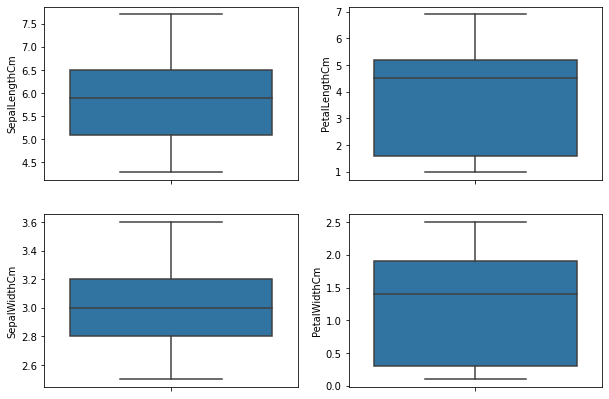

In [12]:
fig,axes = plt.subplots(2,2,figsize=(10,7))
sns.boxplot(data=data,y='SepalLengthCm',ax=axes[0,0])
sns.boxplot(data=data,y='PetalLengthCm',ax=axes[0,1])
sns.boxplot(data=data,y='SepalWidthCm',ax=axes[1,0])
sns.boxplot(data=data,y='PetalWidthCm',ax=axes[1,1])
fig.savefig('OutlieredRemovedBoxplot.png')

## Feature Engineering

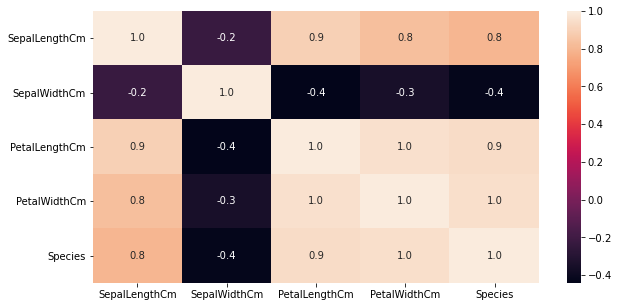

In [56]:
fig = plt.figure(figsize=(10,5))
sns.heatmap(data=data.corr(),annot=True,fmt='.1f')
fig.savefig('Correlation.png')

## Machine Learning

## Preparing data for training

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

In [18]:
le = LabelEncoder()
data['Species'] =le.fit_transform(data['Species'])

C:\Users\daven\Anaconda3\envs\regression\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [20]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [63]:
train_x,test_x,train_y,test_y = train_test_split(data.drop(['Species','SepalLengthCm'],axis=1),data['Species'],test_size=0.1)

In [64]:
train_x.shape,train_y.shape, test_x.shape,test_y.shape

((111, 3), (111,), (13, 3), (13,))

In [65]:
from sklearn.svm import SVC

In [66]:
svc = SVC()

Accuracy -->  100.0 %
----------------------------------------------
Consfusion matrix 
 [[5 0 0]
 [0 2 0]
 [0 0 6]]
------------------------------------------------
Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         6

    accuracy                           1.00        13
   macro avg       1.00      1.00      1.00        13
weighted avg       1.00      1.00      1.00        13



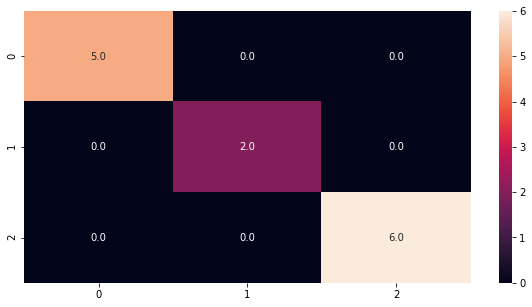

In [67]:
hist = svc.fit(train_x,train_y)
pred = svc.predict(test_x)
print('Accuracy --> ',accuracy_score(pred,test_y)*100,'%')
print('----------------------------------------------')
print('Consfusion matrix \n',confusion_matrix(pred,test_y))
fig = plt.figure(figsize=(10,5))
con = sns.heatmap(confusion_matrix(pred,test_y),annot=True,fmt='.1f')
fig.savefig('Confusion_matrix.png')
print('------------------------------------------------')
print('Classification Report\n',classification_report(pred,test_y))

In [69]:
with open('Results.txt','w')as f:
    string = 'Classification Report \n'+str(classification_report(pred,test_y))
    f.write(string)
    string = '\nAccuracy \t'+str(accuracy_score(pred,test_y))
    f.write(string)